In [20]:
import os
import re
import csv
import random
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
file_path = './trec06p-ai201'

Dataset Labels

In [4]:
label = '/labels'
label_dictionary = {}
with open(file_path+label, 'r') as file:
    for line in file.readlines():
        label_key = line[line.find('data')+5:line.find('data')+12]
        label_value = line[:line.find(' ')]
        label_dictionary[label_key] = label_value

## 1 and 2. Parsing the document and partitioning the data to create the training and test set.

Test Set List

In [5]:
import random

dataset_length = len(label_dictionary)
sample_count = dataset_length*0.3

random.randint(0, 10 - 1)

2

In [6]:
data = '/data/'
data_file_path = file_path+data
folder_list = os.listdir(data_file_path)

test_set = []
while sample_count > 0:
    for folder in folder_list[1:]:
        files = os.listdir(data_file_path+folder)
        for f in files:
            if random.randint(0,1) == 1:
                test_set.append(folder+'/'+f)
                sample_count-=1

Full Dataset

In [7]:
from tqdm import tqdm

In [8]:
# Creation of the training data set
data_set = []
spam_vocabulary = []
ham_vocabulary = []
ham_count = 0
spam_count = 0

spam_set_count = {}
ham_set_count = {}

print(len(folder_list)-1)
for folder in tqdm(folder_list[1:]):
    files = os.listdir(data_file_path+folder)
    now = datetime.now()
    total_files = 0
    for f in files:
        if folder+'/'+f in test_set:
            continue # Excludes the document if it is included in the test set
        file_temp = {}
        file_all_words = []
        with open(data_file_path+folder+'/'+f, 'rb') as file:
            for line in file.readlines():
                try:
                    split_words = [w.lower() for w in re.findall(r'[A-Za-z]+', line.decode('utf-8'))]
                except UnicodeDecodeError:
                    continue
                file_all_words+=split_words
        file_all_words_set = set(file_all_words)
        file_name = folder+'/'+f
        file_temp['file_name'] = file_name
        file_temp['all_words'] = file_all_words # List of all words in the document, not unique
        file_label = label_dictionary[file_name]
        file_temp['correct_label'] = file_label
        if file_label == 'spam':
            spam_vocabulary+=file_all_words_set # Only add unique words in the vocabulary
            spam_count+=1
            
            for word in file_all_words_set:
                        if spam_set_count.get(word.lower(), None):
                            spam_set_count[word.lower()] += 1
                        else:
                            spam_set_count[word.lower()] = 1
                            
        elif file_label == 'ham':
            ham_vocabulary+=file_all_words_set # Only add unique words in the vocabulary
            ham_count+=1
            
            for word in file_all_words_set: 
                        if ham_set_count.get(word.lower(), None):
                            ham_set_count[word.lower()] += 1
                        else:
                            ham_set_count[word.lower()] = 1
            
        data_set.append(file_temp)
        total_files+=1

127


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [04:02<00:00,  1.91s/it]


Test Set - Full

In [9]:
# Creation of the training data set

data = '/data/'
data_file_path = file_path+data
folder_list = os.listdir(data_file_path)
data_set_test = []

print(len(folder_list)-1)
for folder in tqdm(folder_list[1:]):
    files = os.listdir(data_file_path+folder)
    now = datetime.now()
    total_files = 0
    for f in files:
        if folder+'/'+f not in test_set:
            continue
        file_temp = {}
        file_all_words = []
        with open(data_file_path+folder+'/'+f, 'rb') as file:
            for line in file.readlines():
                try:
                    split_words = [w.lower() for w in re.findall(r'[A-Za-z]+', line.decode('utf-8'))]
                except UnicodeDecodeError:
                    continue
                file_all_words+=split_words
        file_name = folder+'/'+f
        file_temp['file_name'] = file_name
        file_temp['all_words'] = file_all_words
        file_label = label_dictionary[file_name]
        file_temp['correct_label'] = file_label            
        data_set_test.append(file_temp)
        total_files+=1

127


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [04:48<00:00,  2.27s/it]


Spam and Ham Vocabulary

In [9]:
spam_set = set(spam_vocabulary)
spam_set_list = list(spam_set)
ham_set = set(ham_vocabulary)
ham_set_list = list(ham_set)

In [10]:
data_set_length = len(data_set)

prior_spam = spam_count / data_set_length
prior_ham = ham_count / data_set_length

In [11]:
print('Prior Spam Probability:', prior_spam)
print('Prior Ham Probability:', prior_ham)

Prior Spam Probability: 0.6580645161290323
Prior Ham Probability: 0.3419354838709677


## 3 and 4. Training the classifier by computing the probabilities based on the training set, and applying the classifier to the test set.

In [12]:
ham_set_probability = {}
for key in ham_set_count:
    ham_set_probability[key] = (ham_set_count[key])/ham_count

In [13]:
spam_set_probability = {}
for key in spam_set_count:
    spam_set_probability[key] = (spam_set_count[key])/spam_count

In [14]:
import math as m

labeled_probability = {}

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

for item in tqdm(data_set_test):
    
    likelihoodA = 1
    likelihoodB = 1

    for word in item['all_words']:
        
        # wlower = word
        
        # spam likelihood
        if spam_set_probability.get(word,0) > 0:
            a_temp = m.exp(m.log(likelihoodA) + m.log(spam_set_probability.get(word)))
        if a_temp <= 0:
            break
        if a_temp != 0:
            likelihoodA = a_temp # m.exp(a_temp)
            
        # ham likelihood
        if ham_set_probability.get(word,0) > 0:
            b_temp = m.exp(m.log(likelihoodB) + m.log(ham_set_probability.get(word)))
        if b_temp <= 0:
            break
        if b_temp != 0:
            likelihoodB = b_temp # m.exp(b_temp)
            
    probability_spam = (likelihoodA * prior_spam) / ( (likelihoodA * prior_spam) + (likelihoodB * prior_ham))
    probability_ham = (likelihoodB * prior_ham) / ( (likelihoodB * prior_ham) + (likelihoodA * prior_spam) )
    
    if probability_spam > probability_ham: 
        labeled_probability[item['file_name']] = 'spam'
    else: 
        labeled_probability[item['file_name']] = 'ham'

Current Time = 21:25:05


100%|██████████████████████████████████████████████████████████████████████████| 18912/18912 [00:09<00:00, 2077.31it/s]


## 5. Evaluation of the Classifier

Test Set Classification Results

In [15]:
labeled_probability_values = list(labeled_probability.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

SPAM: 44.96615905245347 %
HAM: 55.03384094754653 %


Test Set Pre-defined Correct Labels

In [16]:
test_set_labels = {}
for file in data_set_test:
    test_set_labels[file['file_name']] = file['correct_label']

Functions

In [17]:
def get_error_count(labeled_data_set, predicted_data_set):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for k in labeled_data_set.keys():
        if labeled_data_set[k] == 'spam' and predicted_data_set[k] == 'spam':
            TP += 1 # True Positive
        if labeled_data_set[k] == 'ham' and predicted_data_set[k] == 'ham':
            TN += 1 # True Negative
        if labeled_data_set[k] == 'ham' and predicted_data_set[k] == 'spam':
            FP += 1 # False Positive
        if labeled_data_set[k] == 'spam' and predicted_data_set[k] == 'ham':
            FN += 1 # False Negative
    return TP, TN, FP, FN

def get_precision(TP, FP, FN):
    return TP / (TP+FP)

def get_recall(TP, FP, FN):
    return TP / (TP+FN)

Precision and Recall - Regular Implementation

In [18]:
TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability)
print('Precision:', get_precision(TP, FP, FN))
print('Recall:', get_recall(TP, FP, FN))

Precision: 0.8500705550329257
Recall: 0.5798042990054539


## 2.2 Lambda Smoothing

In [19]:
def get_probability_smooth(set_count, count, l):
    set_probability_smooth = {}
    for key in set_count:
        set_probability_smooth[key] = (set_count[key]+l)/count
    return set_probability_smooth

In [20]:
def probability_classification_with_smoothing(data, l, spam, ham, spam_probability_smooth, ham_probability_smooth):
    
    data_length = len(data)
    
    prior_spam = spam/data_length
    prior_ham = ham/data_length
    
    labeled_probability = {}

    for item in data:

        likelihoodA = 1
        likelihoodB = 1
        vocabulary_size = len(item['all_words'])
        all_words = list(item['all_words'])

        for word in all_words:
            
            all_words_count = all_words.count(word) + l
            
            # spam likelihood 
            a_temp = m.exp(m.log(likelihoodA) + m.log(spam_probability_smooth.get(word,l/spam)))
            if a_temp <= 0:
                break
            if a_temp != 0:
                likelihoodA = a_temp
                
        
            # ham likelihood
            b_temp = m.exp(m.log(likelihoodA) + m.log(ham_probability_smooth.get(word,l/ham)))
            if b_temp <= 0:
                break
            if b_temp != 0:
                likelihoodB = b_temp

        probability_spam = (likelihoodA * prior_spam) / ( (likelihoodA * prior_spam) + (likelihoodB * prior_ham))
        probability_ham = (likelihoodB * prior_ham) / ( (likelihoodB * prior_ham) + (likelihoodA * prior_spam) )

        if probability_spam > probability_ham: 
            labeled_probability[item['file_name']] = 'spam'
        else: 
            labeled_probability[item['file_name']] = 'ham'
        
    return labeled_probability

λ = 2.0

In [21]:
lambda_values = []
precision_values = []
recall_values = []

In [22]:
λ = 2

spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

labeled_probability_values_ws2 = probability_classification_with_smoothing(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth, ham_probability_smooth)

labeled_probability_values = list(labeled_probability_values_ws2.values())
total_length = len(labeled_probability_values)
print('SPAM:', round((labeled_probability_values.count('spam')/total_length)*100,2), '%')
print('HAM:', round((labeled_probability_values.count('ham')/total_length)*100,2), '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_ws2)
precision = get_precision(TP, FP, FN) 
recall = get_recall(TP, FP, FN)
print('Precision:', round(precision,2))
print('Recall:', round(recall,2))

lambda_values.append(λ)
precision_values.append(precision)
recall_values.append(recall)

SPAM: 75.04 %
HAM: 24.96 %
Precision: 0.7
Recall: 0.79


λ = 1.0

In [23]:
λ = 1

spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

labeled_probability_values_ws2 = probability_classification_with_smoothing(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth, ham_probability_smooth)

labeled_probability_values = list(labeled_probability_values_ws2.values())
total_length = len(labeled_probability_values)
print('SPAM:', round((labeled_probability_values.count('spam')/total_length)*100), '%')
print('HAM:', round((labeled_probability_values.count('ham')/total_length)*100), '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_ws2)
precision = get_precision(TP, FP, FN) 
recall = get_recall(TP, FP, FN)
print('Precision:', round(precision,2))
print('Recall:', round(recall,2))

lambda_values.append(λ)
precision_values.append(precision)
recall_values.append(recall)

SPAM: 75 %
HAM: 25 %
Precision: 0.7
Recall: 0.79


λ = 0.5

In [24]:
λ = 0.5

spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

labeled_probability_values_ws2 = probability_classification_with_smoothing(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth, ham_probability_smooth)

labeled_probability_values = list(labeled_probability_values_ws2.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_ws2)
precision = get_precision(TP, FP, FN) 
recall = get_recall(TP, FP, FN)
print('Precision:', round(precision,2))
print('Recall:', round(recall,2))

lambda_values.append(λ)
precision_values.append(precision)
recall_values.append(recall)

SPAM: 74.29674280879864 %
HAM: 25.703257191201356 %
Precision: 0.7
Recall: 0.79


λ = 0.1

In [25]:
λ = 0.1

spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

labeled_probability_values_ws2 = probability_classification_with_smoothing(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth, ham_probability_smooth)

labeled_probability_values = list(labeled_probability_values_ws2.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_ws2)
precision = get_precision(TP, FP, FN) 
recall = get_recall(TP, FP, FN)
print('Precision:', round(precision,2))
print('Recall:', round(recall,2))

lambda_values.append(λ)
precision_values.append(precision)
recall_values.append(recall)

SPAM: 73.44014382402707 %
HAM: 26.55985617597293 %
Precision: 0.7
Recall: 0.78


λ = 0.005

In [26]:
λ = 0.005

spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

labeled_probability_values_ws2 = probability_classification_with_smoothing(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth, ham_probability_smooth)

labeled_probability_values = list(labeled_probability_values_ws2.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_ws2)
precision = get_precision(TP, FP, FN) 
recall = get_recall(TP, FP, FN)
print('Precision:', round(precision,2))
print('Recall:', round(recall,2))


lambda_values.append(λ)
precision_values.append(precision)
recall_values.append(recall)

SPAM: 73.2339255499154 %
HAM: 26.766074450084602 %
Precision: 0.7
Recall: 0.77


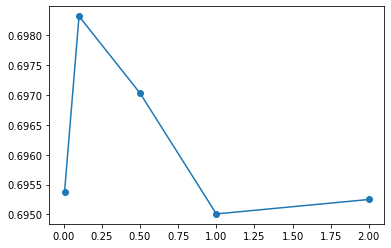

In [27]:
plt.plot(lambda_values, precision_values, marker='o')

In [28]:
print('The lambda with highest precision is', lambda_values[precision_values.index(max(precision_values))])

The lambda with highest precision is 0.1


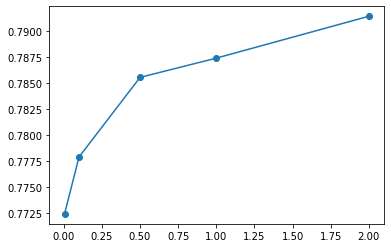

In [29]:
plt.plot(lambda_values, recall_values, marker='o')

In [30]:
print('The lambda with highest recall is', lambda_values[recall_values.index(max(recall_values))])

The lambda with highest recall is 2


## 2.3 Improving the Classifier

In [31]:
full_dictionary = list(set(spam_set_list + ham_set_list))

Modification #1: Trim the list by removing the least frequent words.

In [32]:
orig_len = len(full_dictionary)

trimmed_list = []
spam_set_count_trimmed = {}
ham_set_count_trimmed = {}
for word in full_dictionary:
    if ham_set_count.get(word) and ham_set_count.get(word) >= 2:
        trimmed_list.append(word)
        ham_set_count_trimmed[word] = ham_set_count[word]
    elif spam_set_count.get(word) and spam_set_count.get(word) >= 2:
        trimmed_list.append(word)
        spam_set_count_trimmed[word] = spam_set_count[word]

trimmed_len = len(trimmed_list)
diff = round(((orig_len - trimmed_len) / (orig_len))*100,2)
print(diff, '% of the training set was removed after trimming')

89.44 % of the training set was removed after trimming


In [34]:
λ = 2

spam_probability_smooth = get_probability_smooth(spam_set_count_trimmed, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count_trimmed, ham_count, λ)

labeled_probability_values_trimmed = probability_classification_with_smoothing(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth, ham_probability_smooth)

labeled_probability_values = list(labeled_probability_values_trimmed.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_trimmed)
print('Precision:', get_precision(TP, FP, FN))
print('Recall:', get_recall(TP, FP, FN))

SPAM: 68.4697546531303 %
HAM: 31.530245346869712 %
Precision: 0.7339562900610086
Recall: 0.7622714148219442


**Evaluation: There's a significant increase in precision and decrease in recall for lambda = 2.**

Modification #2: Change the classification treshold

In [35]:
def probability_classification_with_smoothing_tresh(data, l, spam, ham, spam_probability_smooth, ham_probability_smooth, t):
    
    data_length = len(data)
    
    prior_spam = spam/data_length
    prior_ham = ham/data_length
    
    labeled_probability = {}

    for item in data:

        likelihoodA = 1
        likelihoodB = 1
        vocabulary_size = len(item['all_words'])
        all_words = list(item['all_words'])

        for word in all_words:
            
            all_words_count = all_words.count(word) + l
            # spam likelihood  
            a_temp = m.exp(m.log(likelihoodA) + m.log(spam_probability_smooth.get(word,l/spam)))
            if a_temp <= 0:
                break
            if a_temp != 0:
                likelihoodA = a_temp
                     
            # ham likelihood
            b_temp = m.exp(m.log(likelihoodA) + m.log(ham_probability_smooth.get(word,l/ham)))
            if b_temp <= 0:
                break
            if b_temp != 0:
                likelihoodB = b_temp

        probability_spam = (likelihoodA * prior_spam) / ( (likelihoodA * prior_spam) + (likelihoodB * prior_ham))
        probability_ham = (likelihoodB * prior_ham) / ( (likelihoodB * prior_ham) + (likelihoodA * prior_spam) )
        
        if (probability_spam/probability_ham) > t:
            labeled_probability[item['file_name']] = 'spam'
        else: 
            labeled_probability[item['file_name']] = 'ham'
        
    return labeled_probability

In [36]:
λ = 1
t = 1

spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

labeled_probability_values_tresh = probability_classification_with_smoothing_tresh(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth, ham_probability_smooth, t)

labeled_probability_values = list(labeled_probability_values_tresh.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_tresh)
print('Precision:', get_precision(TP, FP, FN))
print('Recall:', get_recall(TP, FP, FN))

SPAM: 74.68802876480541 %
HAM: 25.311971235194587 %
Precision: 0.6950088495575222
Recall: 0.7873756817452678


In [37]:
λ = 2
t = 1

spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

labeled_probability_values_tresh = probability_classification_with_smoothing_tresh(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth, ham_probability_smooth, t)

labeled_probability_values = list(labeled_probability_values_tresh.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_tresh)
print('Precision:', get_precision(TP, FP, FN))
print('Recall:', get_recall(TP, FP, FN))

SPAM: 75.04230118443317 %
HAM: 24.957698815566836 %
Precision: 0.695250845546787
Recall: 0.791385948026949


**Evaluation: No change in precision and recall for lambda=1 and lambda=2.**

Modification #3: Only include words that significantly discriminates between Spam and Ham

In [38]:
spam_docs = []
ham_docs = []
for doc in data_set:
    if doc['correct_label'] == 'spam':
        spam_docs.append(doc['all_words'])
    if doc['correct_label'] == 'ham':
        ham_docs.append(doc['all_words'])

In [39]:
import math
from collections import Counter

ham_word_counts = Counter(word for doc in ham_docs for word in doc)
spam_word_counts = Counter(word for doc in spam_docs for word in doc)

total_ham_docs = len(ham_docs)
total_spam_docs = len(spam_docs)
total_training_length = total_ham_docs + total_spam_docs

mi_scores = {}

for word in tqdm(full_dictionary):
    c1 = ham_word_counts[word] / total_training_length
    c3 = (total_ham_docs - (ham_word_counts[word] if ham_word_counts[word] <= total_ham_docs else total_ham_docs)) / total_training_length
    c2 = spam_word_counts[word] / total_training_length
    c4 = (total_spam_docs - (spam_word_counts[word]) if spam_word_counts[word] <= total_spam_docs else total_spam_docs) / total_training_length
    
    prob1 = c1 * math.log(c1 / ((c1 + c2) * (c1 + c3))) if c1 > 0 else 0
    prob2 = c2 * math.log(c2 / ((c1 + c2) * (c2 + c4))) if c2 > 0 else 0
    prob3 = c3 * math.log(c3 / ((c3 + c4) * (c1 + c3))) if c3 > 0 else 0
    prob4 = c4 * math.log(c4 / ((c3 + c4) * (c2 + c4))) if c4 > 0 else 0
    
    mi_scores[word] = prob1 + prob2 + prob3 + prob4

100%|████████████████████████████████████████████████████████████████████| 1659170/1659170 [00:05<00:00, 317118.57it/s]


In [40]:
n = 200
λ = 1

mi_scores_list = sorted(list(mi_scores.items()),key=lambda x: x[1], reverse=True)
top200 = {k:v for k, v in mi_scores_list[:n]}
spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

top200_list = [k for k in top200.keys()]
spam_probability_smooth_hovold = {}

for k in spam_probability_smooth.keys():
    if k in top200_list:
        spam_probability_smooth_hovold[k] = spam_probability_smooth[k]

ham_probability_smooth_hovold = {}

for k in ham_probability_smooth.keys():
    if k in top200_list:
        ham_probability_smooth_hovold[k] = ham_probability_smooth[k]
        
labeled_probability_values_hovold = probability_classification_with_smoothing(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth_hovold, ham_probability_smooth_hovold)

labeled_probability_values = list(labeled_probability_values_hovold.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_hovold)
print('Precision:', get_precision(TP, FP, FN))
print('Recall:', get_recall(TP, FP, FN))

SPAM: 23.339678510998308 %
HAM: 76.66032148900169 %
Precision: 0.689170820117807
Recall: 0.24398460057747834


In [41]:
n = 200
λ = 2

mi_scores_list = sorted(list(mi_scores.items()),key=lambda x: x[1], reverse=True)
top200 = {k:v for k, v in mi_scores_list[:n]}
spam_probability_smooth = get_probability_smooth(spam_set_count, spam_count, λ)
ham_probability_smooth = get_probability_smooth(ham_set_count, ham_count, λ)

top200_list = [k for k in top200.keys()]
spam_probability_smooth_hovold = {}

for k in spam_probability_smooth.keys():
    if k in top200_list:
        spam_probability_smooth_hovold[k] = spam_probability_smooth[k]

ham_probability_smooth_hovold = {}

for k in ham_probability_smooth.keys():
    if k in top200_list:
        ham_probability_smooth_hovold[k] = ham_probability_smooth[k]
        
labeled_probability_values_hovold = probability_classification_with_smoothing(data_set_test, λ, 
                                spam_count, ham_count, spam_probability_smooth_hovold, ham_probability_smooth_hovold)

labeled_probability_values = list(labeled_probability_values_hovold.values())
total_length = len(labeled_probability_values)
print('SPAM:', (labeled_probability_values.count('spam')/total_length)*100, '%')
print('HAM:', (labeled_probability_values.count('ham')/total_length)*100, '%')

TP, TN, FP, FN = get_error_count(test_set_labels, labeled_probability_values_hovold)
print('Precision:', get_precision(TP, FP, FN))
print('Recall:', get_recall(TP, FP, FN))

SPAM: 23.84200507614213 %
HAM: 76.15799492385787 %
Precision: 0.7360833887779995
Recall: 0.26620147577799164


**Evaluation: Recall and precision decreased, with a lot more significant decrease in recall.**

Top Differences

In [42]:
spam_top = []

for word in tqdm(spam_probability_smooth_hovold.keys()):
    x = spam_probability_smooth_hovold.get(word,0) - ham_probability_smooth_hovold.get(word,0)
    if x > 0.1: spam_top.append(word)
        
print(len(spam_top), 'words in the spam vocabulary had a more than 0.1 difference in probability of ham and spam.')

100%|████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:00<?, ?it/s]

23 words in the spam vocabulary had a more than 0.1 difference in probability of ham and spam.


In [43]:
ham_top = []

for word in tqdm(ham_probability_smooth_hovold.keys()):
    x = ham_probability_smooth_hovold.get(word,0) - spam_probability_smooth_hovold.get(word,0)
    if x > 0.1: ham_top.append(word)
        
print(len(ham_top), 'words in the spam vocabulary had a more than 0.1 difference in probability of ham and spam.')

100%|████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<?, ?it/s]

78 words in the spam vocabulary had a more than 0.1 difference in probability of ham and spam.


Probability Differences in the Full Dictionary

In [44]:
full_dictionary_probdiff = {}

for word in tqdm(full_dictionary):
    full_dictionary_probdiff[word] = abs(spam_probability_smooth_hovold.get(word,0) - ham_probability_smooth_hovold.get(word,0))
    
probdiff_nums = [k for k in full_dictionary_probdiff.values()]
ave_diff = sum(probdiff_nums) / len(probdiff_nums)
max_diff = max(probdiff_nums)
probdiff_nums_sorted = sorted(probdiff_nums)
median_diff = probdiff_nums_sorted[int(len(probdiff_nums_sorted)/2)]
print('Average',ave_diff)
print('Median',median_diff)
print('Max',max_diff)

100%|███████████████████████████████████████████████████████████████████| 1659170/1659170 [00:01<00:00, 1129800.43it/s]


Average 1.3526607495565726e-05
Median 0
Max 0.40403498238144625
